Wednesday 8 January 2020

# Important
To Execute a cell. Press Shift+Enter

In [1]:
#load all the necessary libraries
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

# Python Recap

In [3]:
# here is how you print something
a = 1
b = 2
c = a + b
print(c)

#if you want to show line number View --> Toggle Line Number

3


In [4]:
#conditional statement
x = 3
if x<5:
    print (x, 'is less than five')
else:
    print (x, 'is not less than five')

3 is less than five


In [5]:
#define a function
def f(x):
    a = 2*x + 1
    return a
print(f(10))

21


In [11]:
#while loop
i = 0
while i < 10:
    i+=1
    print(i, end='') #that's how you avoid new line

12345678910

In [12]:
#here is list and use it
a1 = [1,2,3,4,5,6]
for x in a1:
    print(x, end='')
print('----')
for i,x in enumerate(a1): #if you also want the index
    print(i, x)

123456----
0 1
1 2
2 3
3 4
4 5
5 6


In [ ]:
#Hit the plus button to add your own code and the up/down arrows to move it
print('hello')

In [13]:
#here is how to build one (not so beautiful)
#Also notice here that I use a1 from the previous cell.
#once you execute the code it's stored in the kernel
a2 = []
for x in a1:
    a2.append(2*x)
print (a2)

[2, 4, 6, 8, 10, 12]


In [14]:
#But that was ugly
#let us use list comprehension makes it much easier to read (a BETTER alternative)
a3 = [2*x+1 for x in a1]
print (a3)

[3, 5, 7, 9, 11, 13]


In [15]:
#but since we will be using it a lot we have something much better
#it's called numpy array

arr = np.linspace(0,1,10) #this gives you 10 number from 0 to 1 that are equally spaced 
print (arr)
print (2*arr) #array broadcasting magic it does what you think it should
print (arr**2)
print (np.exp(arr)) #exp function

#you can also convert normal list to numpy array if you want
arr3 = np.array(a3)
print(arr3*2)

[ 0.          0.11111111  0.22222222  0.33333333  0.44444444  0.55555556
  0.66666667  0.77777778  0.88888889  1.        ]
[ 0.          0.22222222  0.44444444  0.66666667  0.88888889  1.11111111
  1.33333333  1.55555556  1.77777778  2.        ]
[ 0.          0.01234568  0.04938272  0.11111111  0.19753086  0.30864198
  0.44444444  0.60493827  0.79012346  1.        ]
[ 1.          1.11751907  1.24884887  1.39561243  1.5596235   1.742909
  1.94773404  2.17662993  2.43242545  2.71828183]
[ 6 10 14 18 22 26]


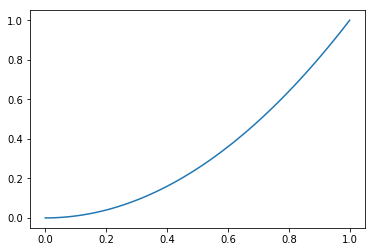

In [16]:
#plotting is easy
xs = np.linspace(0,1,100)
ys = xs**2
plt.plot(xs,ys)
plt.savefig('first_plot.pdf') #you can save it too

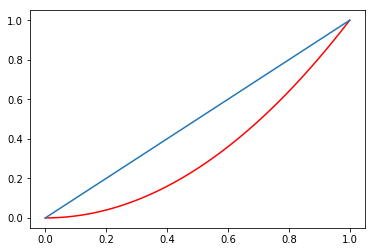

In [17]:
plt.plot(xs,ys, color='red') #change the style too
plt.plot(xs,xs) #and you can plot two things on the same graph
#It can do much more see: http://matplotlib.org/gallery.html

(-1.5, 10)

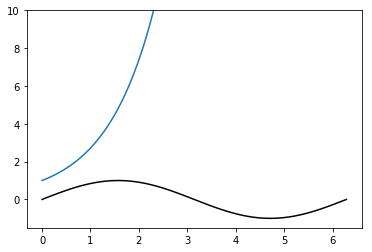

In [15]:
# IN-CLASS EXERCISE
# Graph the following two functions on the same plot
xs = np.linspace(0,2*np.pi,100)
ys1 = np.sin(xs) # y = sin(x)
ys2 = np.exp(xs) # y = e^x

# Graph both on the same plot
plt.plot(xs,ys1,color='black')
plt.plot(xs,ys2)

# Set the y-limit
plt.ylim(-1.5,10)

## Root Finding

#### 1) Consider $x = cos(x)$. Our goal is to solve for x that satisfy that.

Plot something that helps you solve it.

(0.5, 1)

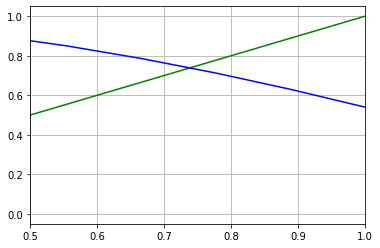

In [10]:
xs = np.linspace(0,1,10)
ys1 = xs # y = x
ys2 = np.cos(xs) # y = cos(x)

plt.plot(xs,ys1,color='green')
plt.plot(xs,ys2,color='blue')
plt.grid()

# "zooming-in"
plt.xlim(0.5,1)

#### 2) Given the what you did what is your answer?

The intersection between the two lines: $x=0.75$

#### 3) How accurate is your answer?
$answer = \ldots \pm \ldots$

Accuracy is also an important part for numerical algorithm --> How fast we can improve our accuracy.

$0.75 \pm 0.05$

** The $\pm$ is VERY important! **

#### 4) Make it more accurate

Write equation in the form $f(x)= 0$ and scan for a root.

#### 5) Write the equation above as $f(x)= 0$

$f(x)= x - cos(x) = 0$

# Bisection

#### 1) If you use a bisection method and your starting bound is $x=0.2$ and $x=1.2$, how do you know that there is a solution by looking only at $f(0.2)$ and $f(1.2)$

If $f(0.2)$ and $f(1.2)$ have different signs, there is a solution between $x=0.2$ and $x=1.2$.

#### 2) Plot the graph along with the two vertical line representing the bound. (use plt.axvline)

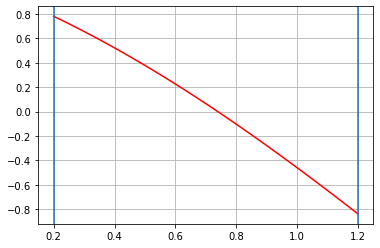

In [15]:
xs = np.linspace(0.2,1.2,100)
ys = np.cos(xs)-xs

plt.grid()
plt.plot(xs,ys,color='red')
plt.axvline(0.2)
plt.axvline(1.2)

#### 3) If we guess right in the middle of the two bounds what would be the error on our guess?
$$
    answer = \ldots \pm \ldots
$$


$0.7 \pm 0.5$

#### 4) If you want to make a new pair of bounds which pair would you pick? How did you know?

The middle and the right bounds because their corresponding f(x) have different signs.

#### 5) Write a function which find solution to f(x)=0 using the method you just discovered. Try plotting as you go.

In [16]:
# The function
def f(x):
    return np.cos(x) - x

# Returns true if the two numbers have different signs
def is_different(l, r):
    return l*r < 0

# Number of times we need to cut based on the desired error e.
def num_iter(e):
    return int(-np.log2(e))

def find_zero(l,r,e):
    if not is_different(f(l),f(r)):
        return 'No solution in this range.'
    
    n = num_iter(e)
    
    for i in range(n):
        m = (l+r)/2
        if is_different(f(l), f(m)):
            r = m
        else:
            l = m
            
    ans = (l+r)/2
    err = (r-l)/2
    return ans, err

#### 6) Given that the intial bound is of size $S$. After $n$ iterations how accurate is your answer?

$$\text{error}(n) = \frac{S}{2^n}$$

#### 7) Give me the solution to  $x=cos(x)$ that is at most  $10^{−6}$ away from the real answer. Verify your solution graphically.

Solution: 0.7390844345092773 +- 9.5367431640625e-07


(-1.3135752355286634e-05, 1.5474477136900866e-05)

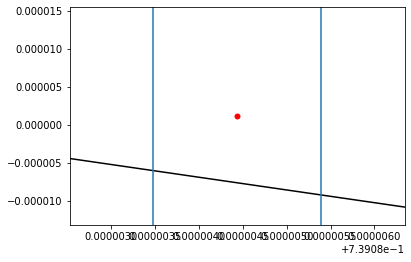

In [22]:
ans, err = find_zero(0.2,1.2,10**-6)

print('Solution:', ans, '+-', err)

xs = np.linspace(0.2,1.2,100)
ys = np.cos(xs)-xs

plt.plot(ans,f(ans),marker='o', markersize=5, color="red")
plt.plot(xs,ys,color='black')
plt.axvline(ans+err)
plt.axvline(ans-err)

plt.xlim(ans-2*err,ans+2*err)
plt.ylim(f(ans)-15*err,f(ans)+15*err)

# Newton's Method
Let us do someting a bit more efficient. Suppose that we want to solve  $x^3−x=1$  using Newtons's method with initial guess at  $x=2$ . If you start to get lost, PLOT!.

#### 1) What is the function that we are trying to find intercept? Plot it.

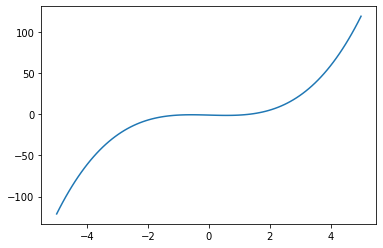

In [23]:
def f(x):
    return x**3 - x - 1

xs = np.linspace(-5,5,100)
ys = f(xs)
plt.plot(xs,ys)



#### 2) What is the slope of the tangent line at $x=2$

In [113]:
def slope(x):
    return 3*x**2 - 1

print(slope(2))

11


#### 3) What is the equation for the tangent line at  $x=2$ Plot it along with the function.

x-intercept =  1.5454545454545454


'y = 11x + -17'

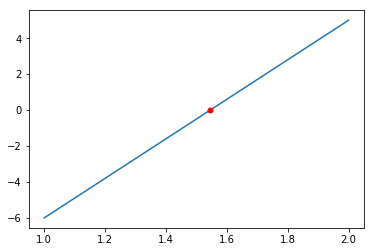

In [127]:
def lin(x):
    m = slope(x)
    c = -m*x + f(x)
    x_int = -c/m
    print("x-intercept = ", x_int)
    
    xs = np.linspace(int(x_int), x, 100)
    ys = m*xs + c
    plt.plot(xs,ys)
    plt.plot(x_int,0,marker='o', markersize=5, color="red")
    
    return "y = " + str(m) + "x + " + str(c)
    
lin(2)

#### 4) What is the intercept for that line? That's your new guess.

In [132]:
# 1.5454

#### 5) Now combine everything in to one formula you should get something along the line of

$$
x_{n+1} = x_n + \frac{(y_n)}{(m_n)}
$$

This is called update rule; how you get an improved answer from the previous guess.

In [122]:
x = 2
for i in range(10):
    x = -f(x)/slope(x) + x

print(x)

1.324717957244746
2.220446049250313e-16


#### 6) Newton's method converges very very quickly. We will go through the derivation later on.
Now find solution to $x^3−x=1$. Also as a plotting exercise try make something similar to this figure:

Here is how I annotate the figure
`plt.annotate('x%d'%i, xy=(x, 0), xytext=(x,-0.2), fontsize=18)`

<img src="trythis.png" width="500px"/>

NameError: name 'f' is not defined

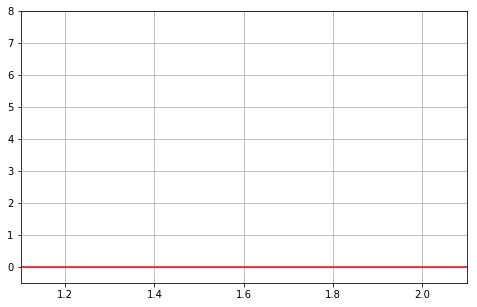

In [2]:
plt.figure(figsize=(8,5))
plt.grid()
plt.xlim(1.1,2.1)
plt.ylim(-0.5,8)
plt.axhline(0, color='red')

# plot f(x)
xs = np.linspace(-5,5,100)
ys = f(xs)
plt.plot(xs,ys)

x = 2
for i in range(4):
    x_int = -f(x)/slope(x) + x
    c = -slope(x)*x + f(x)   
    
    xs = np.linspace(x_int,x,2)
    ys = np.linspace(0,f(x),2)
    plt.plot(xs,ys,color='black')
    xs = np.ones(2)*x
    plt.plot(xs,ys,color='black')
    plt.annotate('$x_%d$'%i, xy=(x, 0), xytext=(x,-0.2), fontsize=18)
    x = x_int

#### 7) Solve $\sqrt[3]{x}=0$ by hand. What's $x$?

#### 8) Try Newton's method on it.
Try plotting as you go to see what's going on.

Now you learn that even though it converges super fast. It doesn't guarantee to converge.

# Bonus


#### 1) Simplify (1+x)-1

#### 2) Then why is this false

In [3]:
x = 1e-10
print (x)
print ((1+x)-1 == x)
# Float > 32bits > cannot store all digits (has round off error)
# When something weird happens, this might be why

1e-10
False
